<a href="https://colab.research.google.com/github/joshuads55/MIT805/blob/main/MIT805_assignment_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install environment and load data

In this section we ensure that the Kaggle cli is installed and the complete dask library.
We then need to upload a Kaggle.json api key file, which will be moved to the appropriate folder location to be used by the cli.

In [ ]:
# Ensure that the kaggle cli and dask dependencies are loaded.
! pip install -q kaggle
! python -m pip install "dask[complete]"    # Install everything

## Uplaod Kaggle API key file

In order to download the data-set from Kaggle, we need to provide an api key file `kaggle.json`. This can be uploaded here.
Instructions to get this file can be found at this [link](https://www.kaggle.com/general/74235)

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"joshuads13","key":"34141654aedbf13ee8d1f1b0a3299505"}'}

In [3]:
# Move the kaggle private key file to the right folder location.
! mkdir ~/.kaggle -p
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Download the dataset to disk.
! kaggle datasets download -d bulter22/airline-data

100% 4.19G/4.20G [00:35<00:00, 158MB/s]
100% 4.20G/4.20G [00:35<00:00, 126MB/s]


In [5]:
# Unzip the dataset into a folder with the same name.
# This takes a few mins.
! unzip airline-data.zip -d airline-data

Archive:  airline-data.zip
  inflating: airline-data/airline.csv.shuffle  
  inflating: airline-data/carriers.csv  


In [6]:
# List the size on disk of both the data sets that are provided in the unzipped folder.
! du ./airline-data/airline.csv.shuffle -h
! du ./airline-data/carriers.csv -h

12G	./airline-data/airline.csv.shuffle
44K	./airline-data/carriers.csv


In [7]:
# Preview the head of the big data file.
! head ./airline-data/airline.csv.shuffle

ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,DayOfWeek,DayofMonth,DepDelay,DepTime,Dest,Distance,Diverted,FlightNum,LateAircraftDelay,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
53,32,-8,1642,1650,1545,65,NA,0,NA,4,10,4,1549,PIT,205,0,209,NA,10,NA,DCA,NA,N443US,7,14,US,NA,2002
164,155,-11,1754,1805,1610,175,NA,0,NA,4,2,0,1610,MCI,1072,0,109,NA,12,NA,MCO,NA,N755,2,7,WN,NA,1999
60,NA,15,2005,1950,1850,60,NA,0,NA,5,10,15,1905,CLT,227,0,1276,NA,12,NA,ATL,NA,NA,NA,NA,DL,NA,1993
51,NA,-5,1818,1823,1728,55,NA,0,NA,4,28,-1,1727,BNA,200,0,961,NA,9,NA,MEM,NA,NA,NA,NA,AA,NA,1989
45,29,2,1120,1118,1030,48,,0,0,1,19,5,1035,CMH,116,0,5873,0,6,0,CVG,0,N785CA,3,13,OH,0,2006
49,37,2,1137,1135,1048,47,NA,0,NA,4,2,0,1048,CLT,156,0,353,NA,1,NA,MYR,NA,N934VJ,6,6,US,NA,1997
61,40,-3,1537,1540,1440,60,,0,NA,7,20,-4,1436,LAW,140,0,3281,NA,7,NA,DFW,NA,N286AE,7,14,MQ,NA,2008
150,126,-19,2015

# Pre-processing

Read in data, define dtypes not inferred corectly and clean up the dataframe.

In [8]:
import dask.dataframe as ddf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
carriers = pd.read_csv("./airline-data/carriers.csv", encoding="ISO-8859-1")

carriers.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [10]:
df = ddf.read_csv("./airline-data/airline.csv.shuffle", encoding="ISO-8859-1",
                  blocksize="120MB", 
                  parse_dates=True,
                  dtype={
                      'CRSElapsedTime': 'float64',
                      'Distance': 'float64', 
                      'WeatherDelay': 'float64',
                      'Year': 'int64', 
                      'ArrTime': 'object', 
                      'CRSArrTime': 'object',
                      'DepTime': 'object', 
                      'Cancelled': 'bool', 
                      'CancellationCode': 'object'})
df.head()

,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,...,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
0,53.0,32.0,-8.0,1642,1650,1545,65.0,NaN,False,NaN,...,10,NaN,DCA,NaN,N443US,7.0,14.0,US,NaN,2002
1,164.0,155.0,-11.0,1754,1805,1610,175.0,NaN,False,NaN,...,12,NaN,MCO,NaN,N755,2.0,7.0,WN,NaN,1999
2,60.0,NaN,15.0,2005,1950,1850,60.0,NaN,False,NaN,...,12,NaN,ATL,NaN,NaN,NaN,NaN,DL,NaN,1993
3,51.0,NaN,-5.0,1818,1823,1728,55.0,NaN,False,NaN,...,9,NaN,MEM,NaN,NaN,NaN,NaN,AA,NaN,1989
4,45.0,29.0,2.0,1120,1118,1030,48.0,NaN,False,0.0,...,6,0.0,CVG,0.0,N785CA,3.0,13.0,OH,0.0,2006


In [11]:
print(df.npartitions)
print(df.dtypes)

100
ActualElapsedTime    float64
AirTime              float64
ArrDelay             float64
ArrTime               object
CRSArrTime            object
CRSDepTime             int64
CRSElapsedTime       float64
CancellationCode      object
Cancelled               bool
CarrierDelay         float64
DayOfWeek              int64
DayofMonth             int64
DepDelay             float64
DepTime               object
Dest                  object
Distance             float64
Diverted               int64
FlightNum              int64
LateAircraftDelay    float64
Month                  int64
NASDelay             float64
Origin                object
SecurityDelay        float64
TailNum               object
TaxiIn               float64
TaxiOut              float64
UniqueCarrier         object
WeatherDelay         float64
Year                   int64
dtype: object


# Generate sample

Here we are generating a sample from the dataset to analyse and get an idea of what each column's data types and data looks like.

In [12]:
sample = df.sample(frac=0.01).compute()

In [13]:
sample.fillna(0, inplace=True)
sample

,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,...,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
158202,114.0,92.0,-7.0,2208,2215,1900,135.0,0,False,0.0,...,1,0.0,ORD,0.0,N341ä1,5.0,17.0,UA,0.0,2001
132074,125.0,0.0,41.0,1105,1024,900,84.0,0,False,0.0,...,11,0.0,LAX,0.0,0,0.0,0.0,PA (1),0.0,1990
463899,95.0,0.0,-4.0,1811,1815,1736,99.0,0,False,0.0,...,4,0.0,TYS,0.0,0,0.0,0.0,UA,0.0,1992
155686,106.0,0.0,-27.0,2221,2248,2030,138.0,0,False,0.0,...,10,0.0,DFW,0.0,0,0.0,0.0,AA,0.0,1993
137777,188.0,0.0,79.0,1930,1811,1645,146.0,0,False,0.0,...,11,0.0,JAX,0.0,0,0.0,0.0,DL,0.0,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690973,52.0,42.0,82.0,1837,1715,1620,55.0,0,False,0.0,...,8,0.0,DAL,0.0,N95,2.0,8.0,WN,0.0,2000
491096,35.0,0.0,-11.0,748,759,715,44.0,0,False,0.0,...,5,0.0,ABE,0.0,0,0.0,0.0,US,0.0,1990
489610,112.0,90.0,2.0,947,945,845,120.0,0,False,0.0,...,4,0.0,BWI,0.0,N265WN,4.0,18.0,WN,0.0,2008
121069,85.0,0.0,-6.0,2129,2135,2006,89.0,0,False,0.0,...,7,0.0,DFW,0.0,0,0.0,0.0,AA,0.0,1993


In [14]:
topDestinations = sample.groupby(by="Dest").count()
topDestinations = topDestinations.sort_values(by="ActualElapsedTime", ascending=False)
topDestinations.ActualElapsedTime[0:15]

Dest
ORD    66410
ATL    61337
DFW    57331
LAX    41074
PHX    34717
DEN    33395
DTW    30197
IAH    28599
MSP    27758
STL    27291
EWR    27160
SFO    27004
LAS    26511
CLT    25149
LGA    22998
Name: ActualElapsedTime, dtype: int64

Text(0, 0.5, 'Count')

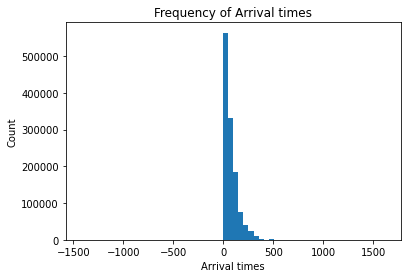

In [15]:
fig, ax = plt.subplots()
ax.hist(sample.AirTime, bins=60)
ax.set_title("Frequency of Arrival times")
ax.set_xlabel("Arrival times")
ax.set_ylabel("Count")

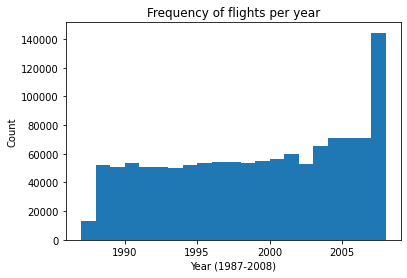

In [16]:
plt.hist(sample.Year, bins=21)
plt.title("Frequency of flights per year")
plt.xlabel("Year (1987-2008)")
plt.ylabel("Count")

plt.show()

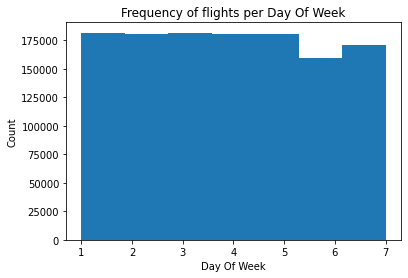

In [17]:
plt.hist(sample.DayOfWeek, bins=7)
plt.title("Frequency of flights per Day Of Week")
plt.xlabel("Day Of Week")
plt.ylabel("Count")

plt.show()

Text(0, 0.5, 'Count')

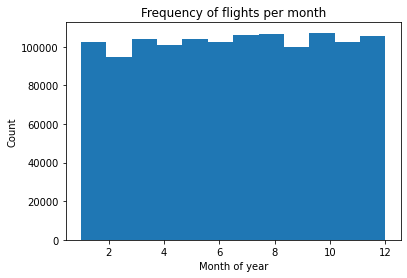

In [26]:
fig, ax = plt.subplots()
ax.hist(sample.Month, bins=12)
ax.set_title("Frequency of flights per month")
ax.set_xlabel("Month of year")
ax.set_ylabel("Count")

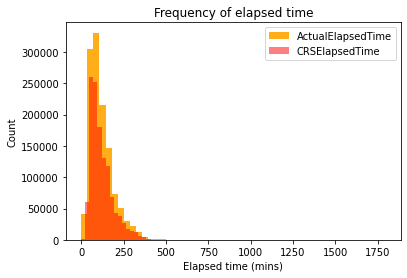

In [41]:
fig, ax = plt.subplots()
ax.hist(sample.ActualElapsedTime, bins=50, color="orange", alpha=0.9, label="ActualElapsedTime")
ax.hist(sample.CRSElapsedTime, bins=50, color="red", alpha=0.5, label="CRSElapsedTime")
ax.set_title("Frequency of elapsed time")
ax.set_xlabel("Elapsed time (mins)")
ax.set_ylabel("Count")

ax.legend()

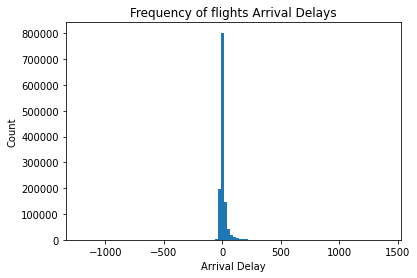

In [18]:
plt.hist(sample.ArrDelay, bins=100)
plt.title("Frequency of flights Arrival Delays")
plt.xlabel("Arrival Delay")
plt.ylabel("Count")

plt.show()

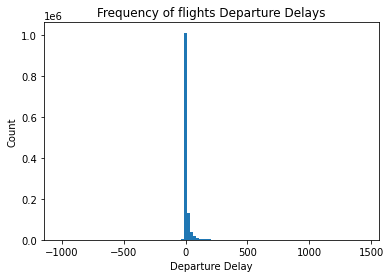

In [19]:
plt.hist(sample.DepDelay, bins=100)
plt.title("Frequency of flights Departure Delays")
plt.xlabel("Departure Delay")
plt.ylabel("Count")

plt.show()

           ActualElapsedTime
Cancelled                   
False                1212437
True                   22918


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


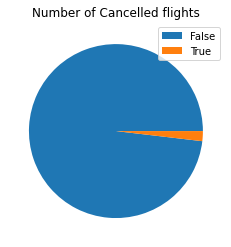

In [21]:
canceledFlights = sample.groupby(by="Cancelled").count()
canceledFlights = canceledFlights.iloc[0:2, 0:1]
print(canceledFlights)
plt.pie(canceledFlights)
plt.title("Number of Cancelled flights")
plt.legend(['False', 'True'])

plt.show()

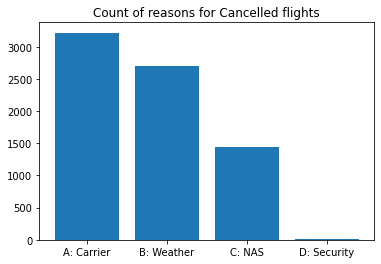

In [22]:
reasonForCancelation = sample[sample.CancellationCode != 0].groupby(by="CancellationCode").count()
reasonForCancelation = reasonForCancelation.iloc[0:, 0:1]
data = np.asarray(reasonForCancelation.ActualElapsedTime[0:])
columns = ['A: Carrier', 'B: Weather', 'C: NAS', 'D: Security']
plt.bar(columns, data)
plt.title("Count of reasons for Cancelled flights")
plt.show()

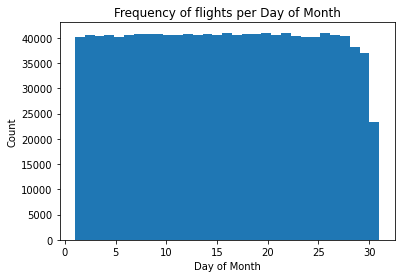

In [23]:
plt.hist(sample.DayofMonth, bins=31)
plt.title("Frequency of flights per Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("Count")

plt.show()

Text(0, 0.5, 'Count')

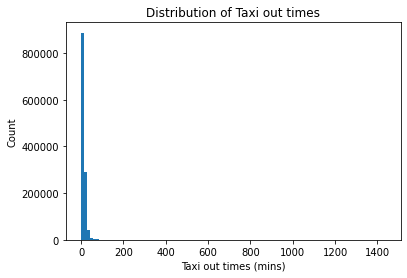

In [24]:
# taxiOutTimes = sample.TaxiOut
fig, ax = plt.subplots()
ax.hist(sample.TaxiOut.dropna(), bins=100)
ax.set_title("Distribution of Taxi out times")
ax.set_xlabel("Taxi out times (mins)")
ax.set_ylabel("Count")

In [33]:
timeSample = sample.copy()
timeSample.DepTime

158202    1914
132074     900
463899    1736
155686    2035
137777    1722
          ... 
690973    1745
491096     713
489610     855
121069    2004
140575    1445
Name: DepTime, Length: 1235355, dtype: object